In [1]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

from utils import get_data, get_X_show, get_metrics, get_post


In [2]:
seed = 24
np.random.seed(seed)

# get data
d_x = 10  # number of fourier features
n_train = 5
n_test = 10000
X_train, Y_train, X_train_orig = get_data(d_x=d_x, n_data=n_train)
X_train_aug, Y_train_aug, _ = get_data(d_x=d_x, n_data=n_train, x_start=100.0)
X_test, Y_test, X_test_orig = get_data(d_x=d_x, n_data=n_test)
X_show, X_show_orig = get_X_show(d_x=d_x)
Y_true = torch.sum(X_show, 1)


# fit

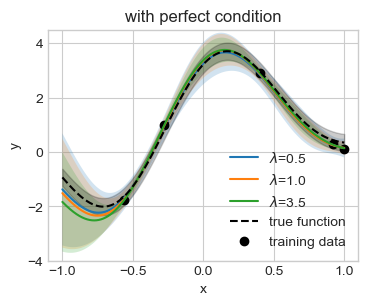

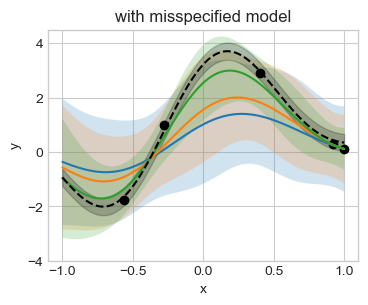

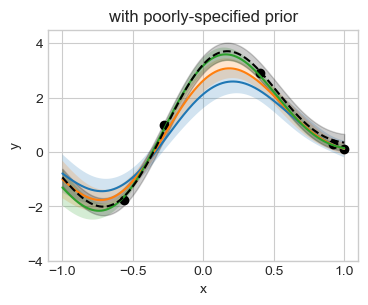

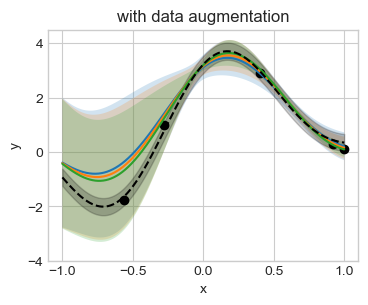

In [16]:
settings = [
    "model_good_prior_good_no_da",
    "model_bad_prior_good_no_da",
    "model_good_prior_bad_no_da",
    "model_good_prior_good_with_da"
]

for setting in settings:

    if setting == "model_good_prior_good_no_da":
        var_likelihood = 0.025
        var_prior = 1.0
    if setting == "model_bad_prior_good_no_da":
        var_likelihood = 1.0
        var_prior = 1.0
    if setting == "model_good_prior_bad_no_da":
        var_likelihood = 0.025
        var_prior = 0.1
    if setting == "model_good_prior_good_with_da":
        var_likelihood = 0.025
        var_prior = 1.0
    
    dir_prefix = f"./{setting}/"
    if not os.path.exists(dir_prefix):
        os.makedirs(dir_prefix)

    if setting == "model_good_prior_good_no_da":
        true_label="true function"
        data_label="training data"
    else:
        true_label=""
        data_label=""

    # model fit
    plt.figure(figsize=(4,3))
    for lamb in [0.5, 1.0, 3.5]:
        if setting == "model_good_prior_good_with_da":
            m_N, S_N, _ = get_post(X_train_aug, Y_train_aug, var_prior, var_likelihood, lamb)
        else:
            m_N, S_N, _ = get_post(X_train, Y_train, var_prior, var_likelihood, lamb)
        post_pred_mean = X_show @ m_N
        post_pred_var = torch.diag(X_show @ S_N @ X_show.T)
        if setting == "model_good_prior_good_no_da":
            lamb_label=r"$\lambda$"+f"={lamb}"
        else:
            lamb_label=""
        plt.plot(X_show_orig, post_pred_mean, label=lamb_label)
        plt.fill_between(
            X_show_orig,
            post_pred_mean + 2 * torch.sqrt(post_pred_var),
            post_pred_mean - 2 * torch.sqrt(post_pred_var),
            alpha=0.2,
        )
        plt.ylim(-4,4.5)

    plt.plot(X_show_orig, Y_true, label=true_label, linestyle="dashed", color="black")
    plt.fill_between(X_show_orig, Y_true + 2 * 0.158, Y_true - 2 * 0.158, alpha=0.2, color="black")
    plt.scatter(X_train_orig, Y_train, label=data_label, marker="o", color="black")
    if setting == "model_good_prior_good_no_da":
        plt.title("with perfect condition")
    if setting == "model_bad_prior_good_no_da":
        plt.title("with misspecified model")
    if setting == "model_good_prior_bad_no_da":
        plt.title("with poorly-specified prior")
    if setting == "model_good_prior_good_with_da":
        plt.title("with data augmentation") 
    plt.xlabel("x")
    plt.ylabel("y")
    if setting == "model_good_prior_good_no_da":
        plt.legend()
    plt.savefig(f"{dir_prefix}/fit_{setting}.png", dpi=300, bbox_inches='tight')
    plt.show()


# metrics
## small range of lambda

0.5
1.0
1.5
2.0
2.5
3.0
3.5


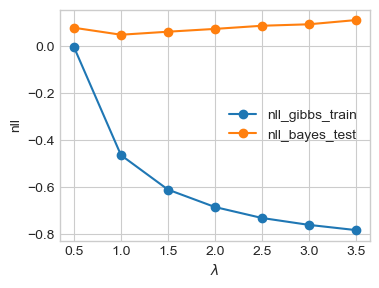

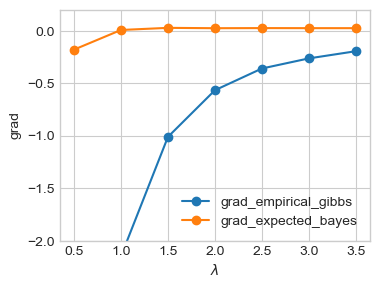

0.5
1.0
1.5
2.0
2.5
3.0
3.5


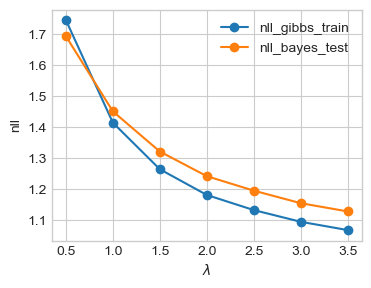

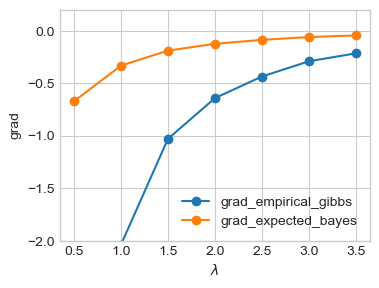

0.5
1.0
1.5
2.0
2.5
3.0
3.5


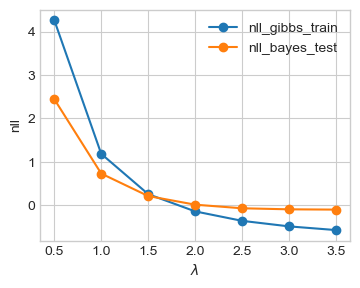

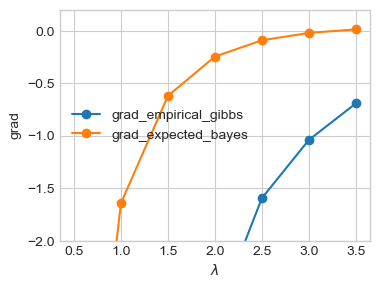

0.5
1.0
1.5
2.0
2.5
3.0
3.5
0.5
1.0
1.5
2.0
2.5
3.0
3.5


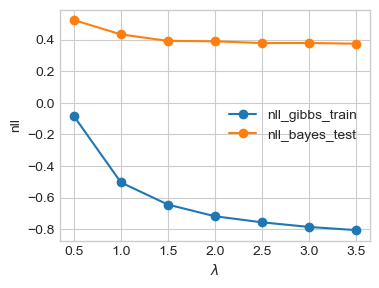

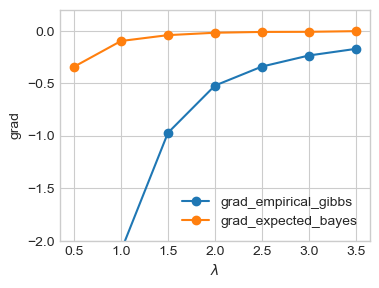

In [15]:
settings = [
    "model_good_prior_good_no_da",
    "model_bad_prior_good_no_da",
    "model_good_prior_bad_no_da",
    "model_good_prior_good_with_da",
]

for setting in settings:

    if setting == "model_good_prior_good_no_da":
        var_likelihood = 0.025
        var_prior = 1.0
    if setting == "model_bad_prior_good_no_da":
        var_likelihood = 1.0
        var_prior = 1.0
    if setting == "model_good_prior_bad_no_da":
        var_likelihood = 0.025
        var_prior = 0.1
    if setting == "model_good_prior_good_with_da":
        var_likelihood = 0.025
        var_prior = 1.0

    dir_prefix = f"./{setting}/"
    if not os.path.exists(dir_prefix):
        os.makedirs(dir_prefix)

    # lambs = np.linspace(0.8, 1.2, 5)
    lambs = [0.5,1.0,1.5,2.0,2.5,3.0,3.5]

    result = get_metrics(
        X_train,
        Y_train,
        X_test,
        Y_test,
        var_prior,
        var_likelihood,
        lambs,
    )
    if setting == "model_good_prior_good_with_da":
        result = get_metrics(
            X_train_aug,
            Y_train_aug,
            X_test,
            Y_test,
            var_prior,
            var_likelihood,
            lambs,
        )

    # nll
    plt.figure(figsize=(4,3))
    plt.plot(
        np.arange(0, len(lambs), 1),
        result["nll_gibbs_train"],
        marker="o",
        label="nll_gibbs_train",
    )
    plt.plot(
        np.arange(0, len(lambs), 1),
        result["nll_bayes_test"],
        marker="o",
        label="nll_bayes_test",
    )
    plt.legend()
    # plt.ylim(-1,3)
    plt.xticks(np.arange(0, len(lambs), 1), lambs)
    plt.xlabel(r"$\lambda$")
    plt.ylabel("nll")
    # plt.title(f"{setting}")
    plt.savefig(f"{dir_prefix}/nll_{setting}.png", dpi=300, bbox_inches='tight')
    plt.show()

    # mse
    # plt.figure(figsize=(4,3))
    # plt.plot(
    #     np.arange(0, len(lambs), 1),
    #     result["mse_gibbs_train"],
    #     marker="o",
    #     label="mse_gibbs_train",
    # )
    # plt.plot(
    #     np.arange(0, len(lambs), 1),
    #     result["mse_bayes_test"],
    #     marker="o",
    #     label="mse_bayes_test",
    # )
    # plt.legend()
    # plt.xticks(np.arange(0, len(lambs), 1), lambs)
    # plt.xlabel(r"$\lambda$")
    # plt.ylabel("mse")
    # # plt.title(f"{setting}")
    # plt.savefig(f"{dir_prefix}/mse_bayes_gibbs_small_{setting}.png", dpi=300, bbox_inches='tight')
    # plt.show()

    plt.figure(figsize=(4,3))
    # grad_empirical_gibbs
    # plt.figure(figsize=(4,3))
    plt.plot(
        np.arange(0, len(lambs), 1),
        result["grad_empirical_gibbs"],
        marker="o",
        label="grad_empirical_gibbs",
    )
    # grad_expected_bayes
    plt.plot(
        np.arange(0, len(lambs), 1),
        result["grad_expected_bayes"],
        marker="o",
        label="grad_expected_bayes",
    )
    # plt.legend()
    # plt.xticks(np.arange(0, len(lambs), 1), lambs)
    # plt.xlabel("lambda")
    # plt.ylabel("grad_expected_bayes")
    # plt.title(f"{setting}")
    # plt.savefig(f"{dir_prefix}/grad_bayes_small_{setting}.png", dpi=300, bbox_inches='tight')
    # plt.show()
    plt.legend()
    plt.xticks(np.arange(0, len(lambs), 1), lambs)
    plt.xlabel(r"$\lambda$")
    plt.ylabel("grad")
    # plt.title(f"{setting}")
    plt.ylim(-2,0.2)
    plt.savefig(f"{dir_prefix}/grad_{setting}.png", dpi=300, bbox_inches='tight')
    plt.show()

In [4]:
## large range
# settings = [
#     "model_good_prior_good_no_da",
#     "model_bad_prior_good_no_da",
#     "model_good_prior_bad_no_da",
# ]

# for setting in settings:

#     if setting == "model_good_prior_good_no_da":
#         var_likelihood = 0.025
#         var_prior = 1.0
#     if setting == "model_bad_prior_good_no_da":
#         var_likelihood = 1.0
#         var_prior = 1.0
#     if setting == "model_good_prior_bad_no_da":
#         var_likelihood = 0.025
#         var_prior = 0.05

#     dir_prefix = f"./{setting}/"
#     if not os.path.exists(dir_prefix):
#         os.makedirs(dir_prefix)

#     lambs = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

#     result = get_metrics(
#         X_train,
#         Y_train,
#         X_test,
#         Y_test,
#         var_prior,
#         var_likelihood,
#         lambs,
#     )

#     # nll
#     plt.figure(figsize=(4,3))
#     plt.plot(
#         np.arange(0, len(lambs), 1),
#         result["nll_gibbs_train"],
#         marker="o",
#         label="nll_gibbs_train",
#     )
#     plt.plot(
#         np.arange(0, len(lambs), 1),
#         result["nll_bayes_test"],
#         marker="o",
#         label="nll_bayes_test",
#     )
#     plt.legend()
#     # plt.ylim(-1,3)
#     plt.xticks(np.arange(0, len(lambs), 1), np.log10(lambs))
#     plt.xlabel("lambda, log scale")
#     plt.ylabel("nll")
#     plt.title(f"{setting}")
#     plt.savefig(f"{dir_prefix}/nll_bayes_gibbs_large_{setting}.png", dpi=300, bbox_inches='tight')
#     plt.show()

#     # mse
#     plt.figure(figsize=(4,3))
#     plt.plot(
#         np.arange(0, len(lambs), 1),
#         result["mse_gibbs_train"],
#         marker="o",
#         label="mse_gibbs_train",
#     )
#     plt.plot(
#         np.arange(0, len(lambs), 1),
#         result["mse_bayes_test"],
#         marker="o",
#         label="mse_bayes_test",
#     )
#     plt.legend()
#     plt.xticks(np.arange(0, len(lambs), 1), np.log10(lambs))
#     plt.xlabel("lambda, log scale")
#     plt.ylabel("mse")
#     plt.title(f"{setting}")
#     plt.savefig(f"{dir_prefix}/mse_bayes_gibbs_large_{setting}.png", dpi=300, bbox_inches='tight')
#     plt.show()

#     # grad_expected_bayes
#     plt.figure(figsize=(4,3))
#     plt.plot(
#         np.arange(0, len(lambs), 1),
#         result["grad_expected_bayes"],
#         marker="o",
#         label="grad_expected_bayes",
#     )
#     plt.legend()
#     plt.xticks(np.arange(0, len(lambs), 1), np.log10(lambs))
#     plt.xlabel("lambda, log scale")
#     plt.ylabel("grad_expected_bayes")
#     plt.title(f"{setting}")
#     plt.savefig(f"{dir_prefix}/grad_bayes_large_{setting}.png", dpi=300, bbox_inches='tight')
#     plt.show()

#     # grad_empirical_gibbs
#     plt.figure(figsize=(4,3))
#     plt.plot(
#         np.arange(0, len(lambs), 1),
#         result["grad_empirical_gibbs"],
#         marker="o",
#         label="grad_empirical_gibbs",
#     )
#     plt.legend()
#     plt.xticks(np.arange(0, len(lambs), 1), np.log10(lambs))
#     plt.xlabel("lambda, log scale")
#     plt.ylabel("grad_empirical_gibbs")
#     plt.title(f"{setting}")
#     plt.savefig(f"{dir_prefix}/grad_gibbs_large_{setting}.png", dpi=300, bbox_inches='tight')
#     plt.show()
